- y = b₀ + b₁x + b₂x² + b₃x³ + ...

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Generate non-linear data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.5 * X.flatten()**2 - 2 * X.flatten() + 3 + np.random.randn(100) * 2

In [18]:
poly_feature = PolynomialFeatures(degree=2, include_bias=True)
x_poly = poly_feature.fit_transform(X)

In [ ]:
model = LinearRegression()
model.fit(x_poly, y)

# Predictions
y_pred = model.predict(x_poly)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"R²: {r2:.2f}")
print(f"MSE: {mse:.2f}")

R²: 0.97
MSE: 2.93


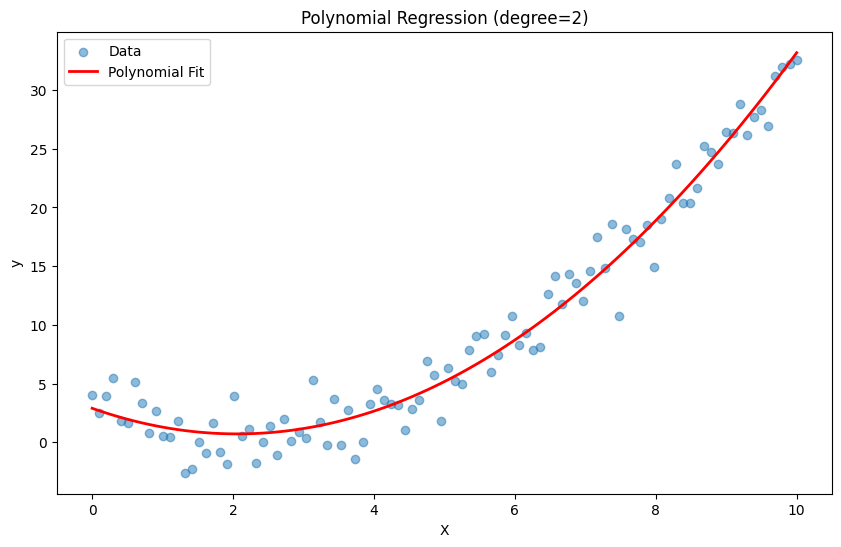

In [21]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, y_pred, 'r-', linewidth=2, label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (degree=2)')
plt.legend()
plt.show()

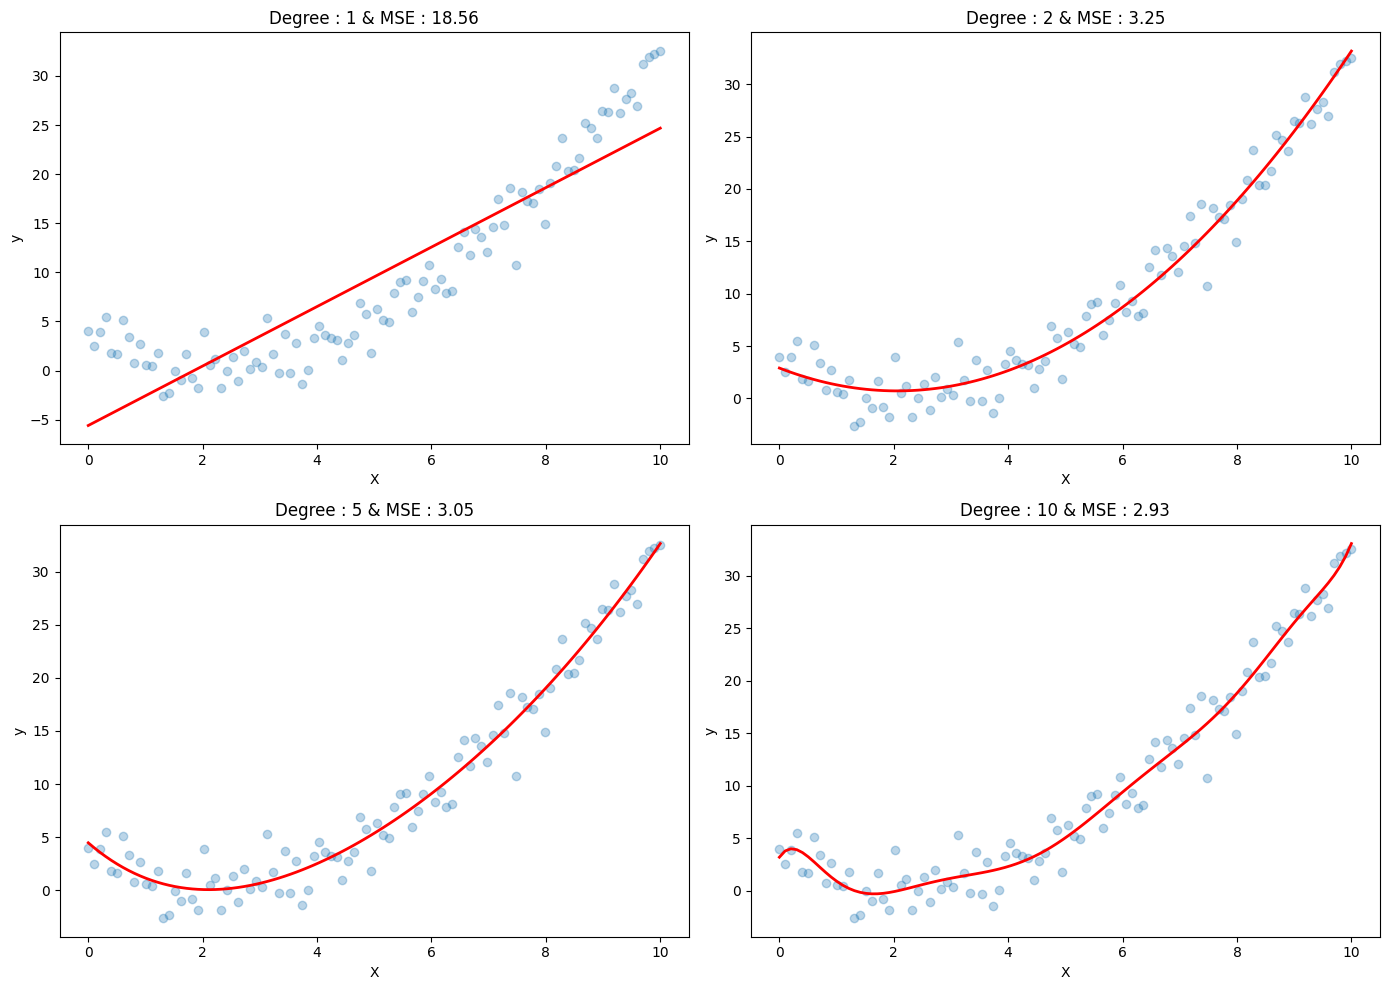

In [25]:
# Compare different degrees
degrees = [1, 2, 5, 10]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    
    axes[idx//2, idx%2].scatter(X, y, alpha=0.3)
    axes[idx//2, idx%2].plot(X, y_pred, 'r-', linewidth=2)
    axes[idx//2, idx%2].set_title(f'Degree : {degree} & MSE : {mse:.2f}')
    axes[idx//2, idx%2].set_xlabel('X')
    axes[idx//2, idx%2].set_ylabel('y')

plt.tight_layout()
plt.show()